### Visualising the data

#### What files are in the input folder:

In [1]:
import os 
print('No. of files: {}'.format(str(len(os.listdir("./input")))))
print(os.listdir("./input"))

No. of files: 8
['Data_Dictionary.xlsx', 'historical_transactions.csv', 'merchants.csv', 'new_merchant_transactions.csv', 'readme.md', 'sample_submission.csv', 'test.csv', 'train.csv']


##### Train and Test files

In [39]:
e = pd.read_excel('./input/Data_Dictionary.xlsx', sheetname='train')
e

train.csv                                         Unnamed: 1
0                 NaN                                                NaN
1             Columns                                        Description
2             card_id                             Unique card identifier
3  first_active_month                 'YYYY-MM', month of first purchase
4           feature_1                Anonymized card categorical feature
5           feature_2                Anonymized card categorical feature
6           feature_3                Anonymized card categorical feature
7              target  Loyalty numerical score calculated 2 months af...

In [105]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null datetime64[ns]
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 9.2+ MB


In [40]:
#Loading Train and Test Data
import pandas as pd

df_train = pd.read_csv("./input/train.csv", parse_dates=["first_active_month"])
df_test = pd.read_csv("./input/test.csv", parse_dates=["first_active_month"])
print("{} observations and {} features in train set.".format(df_train.shape[0],df_train.shape[1]))
print("{} observations and {} features in test set.".format(df_test.shape[0],df_test.shape[1]))

201917 observations and 6 features in train set.
123623 observations and 5 features in test set.


In [3]:
df_train.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0         2017-06-01  C_ID_92a2005557          5          2          1   
1         2017-01-01  C_ID_3d0044924f          4          1          0   
2         2016-08-01  C_ID_d639edf6cd          2          2          0   
3         2017-09-01  C_ID_186d6a6901          4          3          0   
4         2017-11-01  C_ID_cdbd2c0db2          1          3          0   

     target  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749

In [4]:
df_test.head()

first_active_month          card_id  feature_1  feature_2  feature_3
0         2017-04-01  C_ID_0ab67a22ab          3          3          1
1         2017-01-01  C_ID_130fd0cbdd          2          3          0
2         2017-08-01  C_ID_b709037bc5          5          1          1
3         2017-12-01  C_ID_d27d835a9f          2          1          0
4         2015-12-01  C_ID_2b5e3df5c2          5          1          1

Let's now look at the target score 

In [5]:
df_train.target.describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

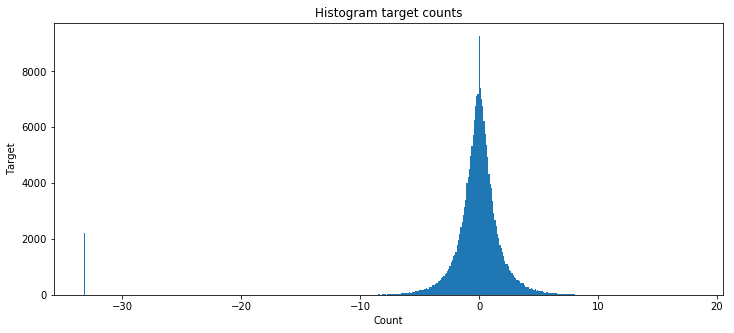

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(df_train.target.values, bins=500)
plt.title('Histogram target counts')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

In [52]:
print('There are {0} samples with target lower than -25.'.format(df_train.loc[df_train.target < -25].shape[0]))

There are 2207 samples with target lower than -25.


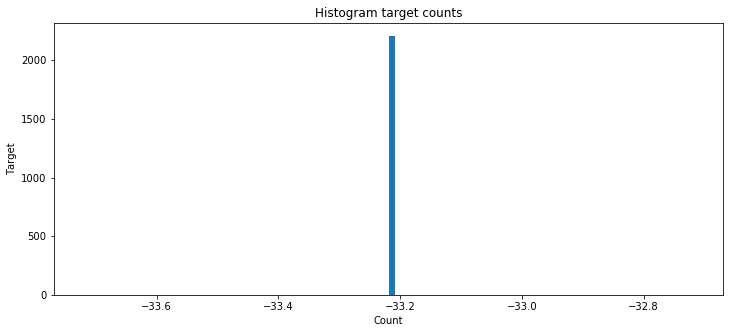

count    2.207000e+03
mean    -3.321928e+01
std      1.193982e-12
min     -3.321928e+01
25%     -3.321928e+01
50%     -3.321928e+01
75%     -3.321928e+01
max     -3.321928e+01
dtype: float64

In [101]:
plt.figure(figsize=(12, 5))
plt.hist(df_train.target.values[:2207], bins=100)
plt.title('Histogram target counts')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

df_train_outliers = pd.Series(df_train.target.values[:2207])
df_train_outliers.describe()

One unique target value for 2207 outliers: -33.21928


Let's now look at the distributions of various "features"

Feature 1

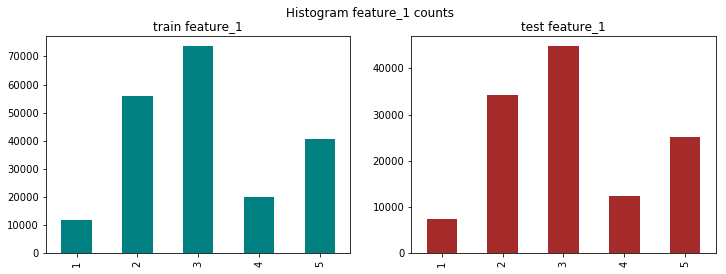

In [87]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4));
df_train['feature_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='train feature_1');
df_test['feature_1'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='test feature_1');
plt.suptitle('Histogram feature_1 counts');
plt.show()

Feature 2

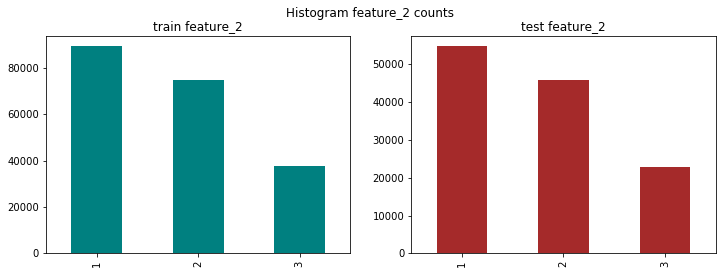

In [89]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4));
df_train['feature_2'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='train feature_2');
df_test['feature_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='test feature_2');
plt.suptitle('Histogram feature_2 counts');
plt.show()

Feature 3

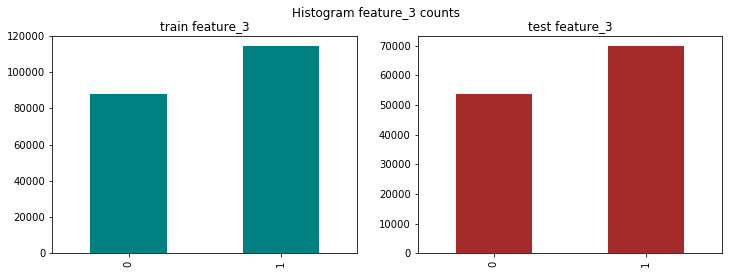

In [90]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4));
df_train['feature_3'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='train feature_3');
df_test['feature_3'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='test feature_3');
plt.suptitle('Histogram feature_3 counts');
plt.show()

- These two plots show an important idea: while different categories of these features could have various counts, the distribution of target is almost the same. This could mean, that these features aren't really good at predicting target - we'll need other features and feature engineering. Also it is worth noticing that mean target values of each catogory of these features is near zero. This could mean that data was sampled from normal distribution.
    

In [109]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

d1 = df_train['first_active_month'].value_counts().sort_index()
d2 = df_test['first_active_month'].value_counts().sort_index()
data = [go.Scatter(x=d1.index, y=d1.values, name='train'), go.Scatter(x=d2.index, y=d2.values, name='test')]
layout = go.Layout(dict(title = "Counts of first active",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Count'),
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

Observations:

- Trends of counts for train and test data are similar, and this is great. Why there is such a sharp decline at the end of the period? I think it was on purpose. Or maybe new cards are taken into account only after fulfilling some conditions.

- TODO Also there is one line with a missing data in test. I'll fill in with the first data, having the same values of features.
 use this: test.loc[test['first_active_month'].isna(), 'first_active_month'] = test.loc[(test['feature_1'] == 5) & (test['feature_2'] == 2) & (test['feature_3'] == 1), 'first_active_month'].min()

##### Historical Transactions
Up to 3 months' worth of historical transactions for each card_id

In [36]:
e = pd.read_excel('./input/Data_Dictionary.xlsx', sheetname='history')
e

historical_transactions.csv  \
0                          NaN   
1                      Columns   
2                      card_id   
3                    month_lag   
4                purchase_date   
5              authorized_flag   
6                   category_3   
7                 installments   
8                   category_1   
9         merchant_category_id   
10                subsector_id   
11                 merchant_id   
12             purchase_amount   
13                     city_id   
14                    state_id   
15                  category_2   

                                          Unnamed: 1  
0                                                NaN  
1                                        Description  
2                                    Card identifier  
3                        month lag to reference date  
4                                      Purchase date  
5                      Y' if approved, 'N' if denied  
6                                anonymized category  
7                 number of installments of purchase  
8                                anonymized category  
9         Merchant category identifier (anonymized )  
10  Merchant category group identifier (anonymized )  
11                  Merchant identifier (anonymized)  
12                        Normalized purchase amount  
13                     City identifier (anonymized )  
14                    State identifier (anonymized )  
15                               anonymized category

In [199]:
#Loading historical transaction Data
import pandas as pd

df_historical_transactions = pd.read_csv('./input/historical_transactions.csv')
print(f'{df_historical_transactions.shape[0]} samples in data')
df_historical_transactions.head(12)


29112361 samples in data


authorized_flag          card_id  city_id category_1  installments  \
0                Y  C_ID_4e6213e9bc       88          N             0   
1                Y  C_ID_4e6213e9bc       88          N             0   
2                Y  C_ID_4e6213e9bc       88          N             0   
3                Y  C_ID_4e6213e9bc       88          N             0   
4                Y  C_ID_4e6213e9bc       88          N             0   
5                Y  C_ID_4e6213e9bc      333          N             0   
6                Y  C_ID_4e6213e9bc       88          N             0   
7                Y  C_ID_4e6213e9bc        3          N             0   
8                Y  C_ID_4e6213e9bc       88          N             0   
9                Y  C_ID_4e6213e9bc       88          N             0   
10               Y  C_ID_4e6213e9bc       88          N             0   
11               Y  C_ID_4e6213e9bc       -1          N             0   

   category_3  merchant_category_id      merchant_id  month_lag  \
0           A                    80  M_ID_e020e9b302         -8   
1           A                   367  M_ID_86ec983688         -7   
2           A                    80  M_ID_979ed661fc         -6   
3           A                   560  M_ID_e6d5ae8ea6         -5   
4           A                    80  M_ID_e020e9b302        -11   
5           A                    80  M_ID_50af771f8d          0   
6           A                   278  M_ID_5e8220e564        -11   
7           A                    80  M_ID_9d41786a50         -3   
8           A                    80  M_ID_979ed661fc         -8   
9           A                    80  M_ID_74ba14b5fc        -11   
10          A                   683  M_ID_1449f22bfb         -9   
11          A                   560  M_ID_7c5e93af2f          0   

    purchase_amount        purchase_date  category_2  state_id  subsector_id  
0         -0.703331  2017-06-25 15:33:07         1.0        16            37  
1         -0.733128  2017-07-15 12:10:45         1.0        16            16  
2         -0.720386  2017-08-09 22:04:29         1.0        16            37  
3         -0.735352  2017-09-02 10:06:26         1.0        16            34  
4         -0.722865  2017-03-10 01:14:19         1.0        16            37  
5         -0.734887  2018-02-24 08:45:05         1.0         9            37  
6         -0.716855  2017-03-21 00:10:51         1.0        16            37  
7         -0.657049  2017-11-18 20:05:55         1.0        16            37  
8         -0.737967  2017-06-01 22:02:56         1.0        16            37  
9         -0.715352  2017-03-16 15:41:22         1.0        16            37  
10        -0.734135  2017-05-09 12:42:07         1.0        16            34  
11        -0.727929  2018-02-08 20:05:45         NaN        -1            34

Authorized flag

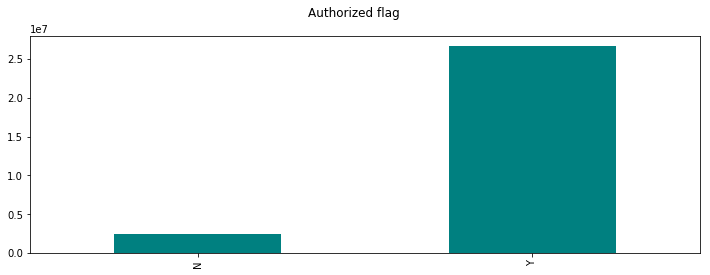

In [200]:
fig, ax = plt.subplots(1, 1, figsize = (12, 4));
df_historical_transactions['authorized_flag'].value_counts().sort_index().plot(kind='bar', ax=ax, color='teal', title='');
plt.suptitle('Authorized flag');
plt.show()

In [201]:
df_historical_transactions['authorized_flag'].value_counts(normalize=True)

Y    0.913545
N    0.086455
Name: authorized_flag, dtype: float64

In [202]:
# let's convert the authorized_flag to a binary value.
df_historical_transactions['authorized_flag'] = df_historical_transactions['authorized_flag'].apply(lambda x: 1 if x == 'Y' else 0)

In [203]:
autorized_card_rate = df_historical_transactions.groupby(['card_id'])['authorized_flag'].mean().sort_values()
autorized_card_rate.head(20)

card_id
C_ID_744d26ea32    0.030488
C_ID_bb8dd137c9    0.037037
C_ID_e56202cd39    0.042105
C_ID_4feacff118    0.050000
C_ID_c27b4f80f7    0.054545
C_ID_5ab09665de    0.064815
C_ID_6b0a61c92f    0.067073
C_ID_18cb630a80    0.069892
C_ID_74fa19fdc5    0.074468
C_ID_5135a41b16    0.074468
C_ID_df044f32ba    0.075472
C_ID_9df7a3ff5d    0.076503
C_ID_3e01e61aca    0.077348
C_ID_2cb58dfc19    0.083086
C_ID_4ab260b799    0.085714
C_ID_199f286f1e    0.086207
C_ID_de6fe55adb    0.086420
C_ID_f2bee63d47    0.086957
C_ID_7a796c720b    0.088889
C_ID_6ce1a11dbc    0.096154
Name: authorized_flag, dtype: float64

In [204]:
print("Cards with low to 50/50 no. of authorized transactions {}".format(len([1 for x in autorized_card_rate if x < 0.50])))

Cards with low to 50/50 no. of authorized transactions 3888


In [205]:
print("Cards with perfect authorized transactions {}".format(len([1 for x in autorized_card_rate if x > 0.99999])))

Cards with perfect authorized transactions 49839


Installments

In [206]:
df_historical_transactions['installments'].value_counts()

 0      15411747
 1      11677522
 2        666416
 3        538207
 4        179525
-1        178159
 6        132634
 10       118827
 5        116090
 12        55064
 8         20474
 7         10906
 9          5772
 11          830
 999         188
Name: installments, dtype: int64

Observation:
what are -1 and 999??? Are they filling in for missing values??

In [207]:
df_historical_transactions.groupby(['installments'])['authorized_flag'].mean()

installments
-1      0.885692
 0      0.928032
 1      0.907024
 2      0.884020
 3      0.862254
 4      0.819903
 5      0.809183
 6      0.779732
 7      0.693196
 8      0.692439
 9      0.663721
 10     0.702021
 11     0.660241
 12     0.653694
 999    0.031915
Name: authorized_flag, dtype: float64

On the other hand it seems that 999 could mean fraud transactions, considering only 3% of these transactions were approved. One more interesting thing is that the higher the number of installments is, the lower is the approval rate.

In [181]:
TODO transform these:
    historical_transactions['installments'] = historical_transactions['installments'].astype('category')
    historical_transactions['purchase_date'] = pd.to_datetime(historical_transactions['purchase_date'])
    

SyntaxError: invalid syntax (<ipython-input-181-11e5a2267c4f>, line 1)

Purchase Amount

Purchase_amount is normalized.

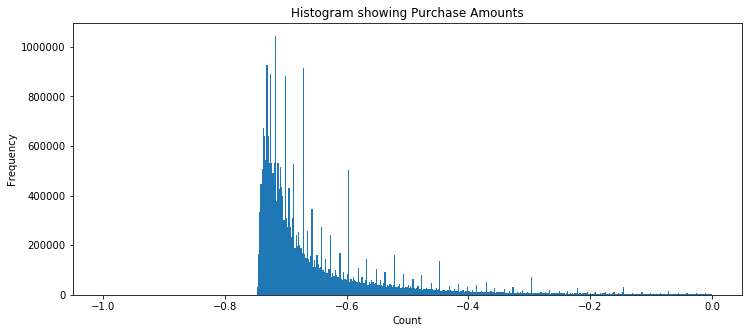

In [208]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(df_historical_transactions['purchase_amount'].values, bins=500, range=(-1, 0))
plt.title('Histogram showing Purchase Amounts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

In [209]:
for i in [-1, 0]:
    n = df_historical_transactions.loc[df_historical_transactions['purchase_amount'] < i].shape[0]
    print(f"There are {n} transactions with purchase_amount less than {i}.")
for i in [0, 10, 100]:
    n = df_historical_transactions.loc[df_historical_transactions['purchase_amount'] > i].shape[0]
    print(f"There are {n} transactions with purchase_amount more than {i}.")

There are 0 transactions with purchase_amount less than -1.
There are 28036884 transactions with purchase_amount less than 0.
There are 1075467 transactions with purchase_amount more than 0.
There are 14924 transactions with purchase_amount more than 10.
There are 1183 transactions with purchase_amount more than 100.


Observation:
- It seems that almost all transactions have purchase amount in range (-1, 0). Quite a strong normalization and high outliers, which will need to be processed.

Categories

In [210]:
df_historical_transactions['category_1'].value_counts()

N    27028332
Y     2084029
Name: category_1, dtype: int64

In [214]:
nan_rows = df_historical_transactions[df_historical_transactions['category_1'].isnull()]
print("Number of category_1 rows with null values: {} ".format(len(nan_rows.values)))

Number of category_1 rows with null values: 0 


In [220]:
map_dict = {'Y': 0, 'N': 1}
df_historical_transactions['category_1'] = df_historical_transactions['category_1'].apply(lambda x: map_dict[x])
df_historical_transactions.groupby(['category_1']).agg({'purchase_amount': ['mean', 'std', 'count'], 'authorized_flag': ['mean', 'std']})

purchase_amount                        authorized_flag          
                      mean          std     count            mean       std
category_1                                                                 
0                -0.419327    22.087594   2084029        0.748578  0.433830
1                 0.071540  1166.016045  27028332        0.926265  0.261339

In [193]:
df_historical_transactions['category_2'].value_counts()

1.0    15177199
3.0     3911795
5.0     3725915
4.0     2618053
2.0     1026535
Name: category_2, dtype: int64

In [216]:
nan_rows = df_historical_transactions[df_historical_transactions['category_2'].isnull()]
print("Number of category_2 rows with null values: {} ".format(len(nan_rows.values)))

Number of category_2 rows with null values: 2652864 


In [222]:
df_historical_transactions.groupby(['category_2']).agg({'purchase_amount': ['mean', 'std', 'count'], 'authorized_flag': ['mean', 'std']})

purchase_amount                        authorized_flag          
                      mean          std     count            mean       std
category_2                                                                 
1.0               0.149570  1548.714128  15177199        0.927505  0.259306
2.0              -0.165690    89.285770   1026535        0.906225  0.291515
3.0               0.180375   210.616100   3911795        0.918857  0.273055
4.0              -0.158951   141.945606   2618053        0.927634  0.259094
5.0              -0.104457   162.428785   3725915        0.934260  0.247826

In [194]:
df_historical_transactions['category_3'].value_counts()

A    15411747
B    11677522
C     1844933
Name: category_3, dtype: int64

In [217]:
nan_rows = df_historical_transactions[df_historical_transactions['category_3'].isnull()]
print("Number of category_3 rows with null values: {} ".format(len(nan_rows.values)))

Number of category_3 rows with null values: 178159 


In [224]:
map_dict = {'A': 0, 'B': 1, 'C': 2, 'nan': 3}
df_historical_transactions['category_3'] = df_historical_transactions['category_3'].apply(lambda x: map_dict[str(x)])
df_historical_transactions.groupby(['category_3']).agg({'purchase_amount': ['mean', 'std', 'count'], 'authorized_flag': ['mean', 'std']})

purchase_amount                        authorized_flag          
                      mean          std     count            mean       std
category_3                                                                 
0                 0.361926  1541.485188  15411747        0.928032  0.258436
1                -0.404556   104.062692  11677522        0.907024  0.290399
2                 0.106023    24.047655   1844933        0.836498  0.369824
3                 0.058447     2.191567    178159        0.885692  0.318186

Quick summary of the rest of the properties in historical transactions

In [226]:
for col in ['city_id', 'merchant_category_id', 'merchant_id', 'state_id', 'subsector_id']:
    print(f"There are {df_historical_transactions[col].nunique()} unique values in {col}.")

There are 308 unique values in city_id.
There are 327 unique values in merchant_category_id.
There are 326311 unique values in merchant_id.
There are 25 unique values in state_id.
There are 41 unique values in subsector_id.


### Cleaning and fixing data

In [114]:
Lets create some activity
def newfunc():
    pass

SyntaxError: invalid syntax (<ipython-input-114-15f3a0211bf0>, line 1)

### Feature engineering

### Define models and evaluate